In [1]:
txt = 'anonymized-curriculum-access.txt'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import env

In [3]:
df= pd.read_table('anonymized-curriculum-access.txt',header=None)

In [4]:
df.head()

,0
0,2018-01-26 09:55:03 / 1 8 97.105.19.61
1,2018-01-26 09:56:02 java-ii 1 8 97.105.19.61
2,2018-01-26 09:56:05 java-ii/object-oriented-pr...
3,2018-01-26 09:56:06 slides/object_oriented_pro...
4,2018-01-26 09:56:24 javascript-i/conditionals ...


In [5]:
df.nunique()

0    896471
dtype: int64

In [6]:
df[0][0].split()

['2018-01-26', '09:55:03', '/', '1', '8', '97.105.19.61']

In [7]:
parts = df[0][0].split()

output = {}
output['ip'] = parts[5]
output['date'] = parts[0]
output['time'] = parts[1]
output['java'] = parts[2]
output

{'ip': '97.105.19.61', 'date': '2018-01-26', 'time': '09:55:03', 'java': '/'}

In [8]:
pd.Series(output)

ip      97.105.19.61
date      2018-01-26
time        09:55:03
java               /
dtype: object

In [9]:
def parse_log_entry(entry):
    parts = entry.split()
    output = {}
    output['ip'] = parts[-1]
    output['date'] = parts[0]
    output['time'] = parts[1]
    output['java'] = parts[2]
    return pd.Series(output)

In [10]:
df = df[0].apply(parse_log_entry)

In [11]:
df.head()

,ip,date,time,java
0,97.105.19.61,2018-01-26,09:55:03,/
1,97.105.19.61,2018-01-26,09:56:02,java-ii
2,97.105.19.61,2018-01-26,09:56:05,java-ii/object-oriented-programming
3,97.105.19.61,2018-01-26,09:56:06,slides/object_oriented_programming
4,97.105.19.61,2018-01-26,09:56:24,javascript-i/conditionals


In [12]:
df.ip.value_counts()

97.105.19.58       284579
97.105.19.61        61662
192.171.117.210      9515
71.150.217.33        6791
76.185.145.231       4754
                    ...  
172.58.109.140          1
99.203.213.59           1
99.203.212.173          1
173.239.198.246         1
72.181.124.244          1
Name: ip, Length: 5531, dtype: int64

In [13]:
ip_df = pd.DataFrame(df.ip.value_counts(dropna=False)).reset_index().rename(columns={'index': 'ip', 'ip': 'count'})
ip_df.head()

,ip,count
0,97.105.19.58,284579
1,97.105.19.61,61662
2,192.171.117.210,9515
3,71.150.217.33,6791
4,76.185.145.231,4754


In [14]:
df.ip.count()

900223

In [15]:
ip_df2 = pd.DataFrame((df.ip.value_counts(dropna=False))/df.ip.count()).reset_index().rename(columns={'index': 'ip', 'ip': 'chance'})
ip_df2.head()

,ip,chance
0,97.105.19.58,0.316121
1,97.105.19.61,0.068496
2,192.171.117.210,0.010570
3,71.150.217.33,0.007544
4,76.185.145.231,0.005281


In [16]:
284579/900223

0.3161205612387153

In [17]:
ip_df = ip_df.merge(ip_df2, on='ip')
ip_df.head()

,ip,count,chance
0,97.105.19.58,284579,0.316121
1,97.105.19.61,61662,0.068496
2,192.171.117.210,9515,0.010570
3,71.150.217.33,6791,0.007544
4,76.185.145.231,4754,0.005281


In [18]:
ip_df.set_index('ip')['count'].sort_values()

ip
72.181.124.244          1
99.203.154.42           1
99.203.27.189           1
131.194.184.123         1
107.242.125.44          1
                    ...  
76.185.145.231       4754
71.150.217.33        6791
192.171.117.210      9515
97.105.19.61        61662
97.105.19.58       284579
Name: count, Length: 5531, dtype: int64

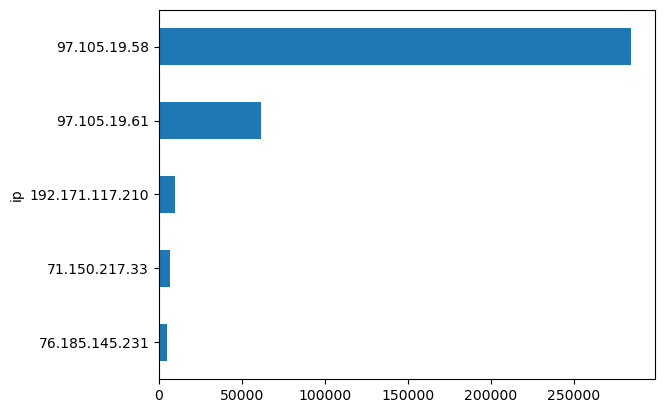

In [19]:
ip_df.set_index('ip')['count'].sort_values().tail(5).plot.barh()
plt.show()

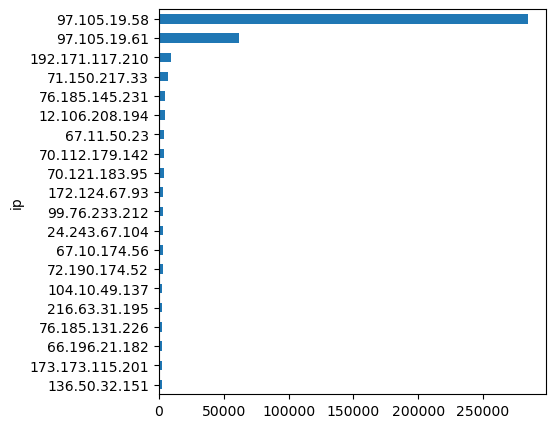

In [20]:
ip_df.set_index('ip')['count'].sort_values().tail(20).plot.barh(figsize=(5,5))
plt.show()

In [21]:
time_df = pd.DataFrame(df.time.value_counts(dropna=False)).reset_index().rename(columns={'index': 'time', 'time': 'count'})
time_df.head()

,time,count
0,09:03:00,81
1,09:01:59,79
2,09:02:45,75
3,09:02:16,75
4,09:05:45,74


In [24]:
time_df.tail()

,time,count,ip,chance
19388811,07:28:59,1,172.58.109.140,0.000001
19388812,07:28:59,1,99.203.213.59,0.000001
19388813,07:28:59,1,99.203.212.173,0.000001
19388814,07:28:59,1,173.239.198.246,0.000001
19388815,07:28:59,1,72.181.124.244,0.000001


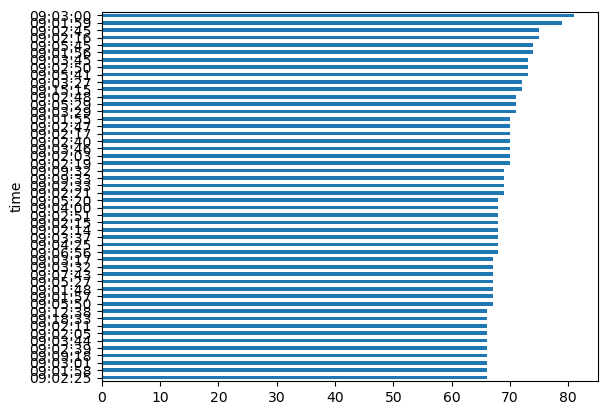

In [22]:
time_df.set_index('time')['count'].sort_values().tail(50).plot.barh()
plt.show()

In [23]:
time_df = time_df.merge(ip_df, on='count')
time_df.head(20)

,time,count,ip,chance
0,09:03:00,81,104.219.136.100,0.000090
1,09:03:00,81,72.191.30.236,0.000090
2,09:03:00,81,70.114.36.54,0.000090
3,09:03:00,81,47.183.128.23,0.000090
4,09:03:00,81,24.243.31.59,0.000090
5,09:01:59,79,136.49.16.212,0.000088
6,09:01:59,79,173.174.211.244,0.000088
7,09:01:59,79,71.158.155.73,0.000088
8,09:01:59,79,23.228.172.124,0.000088
9,09:01:59,79,71.137.144.185,0.000088


1.  97.105.19.58 has 284579 visits, 97.105.19.61 has 61662 visits, 192.171.117.210 has 9515 visits, 71.150.217.33 has 6791 visits, 76.185.145.231 has 4754 visits
2. 04.219.136.100,72.191.30.236,70.114.36.54,47.183.128.23 and 24.243.31.59 have an equal amounts of high traffic
4. 172.58.109.140, 99.203.213.59, 99.203.212.173, 173.239.198.246, and 72.181.124.244 seem to operate at unusual hours.
6. 97.105.19.58, 97.105.19.61, 192.171.117.210, 71.150.217.33, and 76.185.145.231 are referenced alot
7. 76.185.145.231, 71.150.217.33, 192.171.117.210, 97.105.19.61, and 97.105.19.58 are least viewed
